In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Assignment: Golf putting probability

In golf, the term [putt](https://en.wikipedia.org/wiki/Golf_swing#Putt) refers to a precision stroke that is executed by the player from a relatively short distance, aiming at sending the ball directly in the hole. 

Consider the following dataset of putt strokes executed by professional golf players, where $x$ is the distance from the hole discretized in 19 *levels*; $n$ is the total number of shots recorded at each distance level; and $y$ the number of successful putts, among the $n$ recorded.

In [2]:
data = pd.read_csv("golf.csv")
data["x"] = data["x"] # normalized units. True distance (in feet) is 20*x
data["y"] = data["y"]
data["n"] = data["n"]
data.head()

,x,n,y
0,0.10,1443,1346
1,0.15,694,577
2,0.20,455,337
3,0.25,353,208
4,0.30,272,149


Note that the distance $x$ is provided in 0-1 normalized units for numerical convenience. The true distance (in feet) may be obtained by multiplying $x$ by 20. Please stick with the normalized units in the assignment.

## Data exploration

We may compute and visualize the fraction of successful puts at all distance levels:

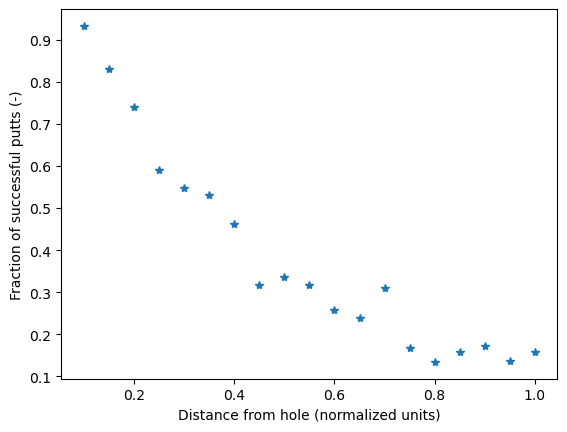

In [3]:
x = data["x"].values
y = data["y"].values
n = data["n"].values
frac = y/n # fraction of successful puts at a given distance level

plt.figure()
plt.plot(x, frac, "*")
plt.xlabel("Distance from hole (normalized units)")
plt.ylabel("Fraction of successful putts (-)");

Clearly, the probability of making the shot decreases with the distance from the hole. We aim at building a probabilistic model that relates the probability of successful putts with the distance from the hole.

## Modeling assumptions

For the probabilistic model, we make the following assumptions:

1. The outcome of the $n_i$ strokes at each distance levels $x_i$ are *independent*. Each stroke in the group has probability $p_i$ of success.

2. The probability of success $p_i$ depends on the distance $x_i$ as follows:
    $$p_i =  \rm{sigm}(\alpha x + \beta)$$ 
    where 
    $$
    \rm{sigm}(z) = \frac{1}{1 + e^{-z}}.
    $$
3. The prior probability of the parameters 
$\theta \triangleq \begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}$
is Gaussian: 
\begin{align}
\alpha &\sim N(\mu_\alpha, \sigma^2_\alpha), \qquad \mu_\alpha = 0, \sigma_\alpha=1\\
\beta &\sim N(\mu_\beta, \sigma^2_\beta), \qquad \mu_\beta=0, \sigma_\beta=1.
\end{align}
4. The outcomes of the 19 distance levels are independent of each other, given $\theta$.

## 1.1: Probabilistic model

* Derive and comment the full probabilistic model.

Putting together probabilistic assumptions 1-3, we obtain:

\begin{align*}
y_i | p_i &\sim  \mathrm{Binomial}(n_i, \rm{sigm}(\alpha x_i + \beta))\\
%p_i &= \rm{sigm}(\alpha + \beta x_i) \\
\alpha &\sim N(0, 1)\\
\beta &\sim N(0, 1).
\end{align*}

Furthermore, according to assumption 4:

$$P(y|\theta) = \prod_i P(y_i|\theta)$$

## 1.2: Maximum Likelihood estimation 

* Derive an analytical expression of the likelihood function $\mathcal{L}(\theta) = P(y|\theta)$.

* Derive an analytical expression of the log-likelihood function $\ell(\theta)$. 

* Write a Python function corresponding to the log-likelihood function $\ell(\theta)$, up to an additive term that does not depend on $\theta$.

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [22]:
def log_lik(alpha, beta):
    ...

* Visualize the log-likelihood $\ell(\theta)$ up to an additive term in 2D.

HINT: a reasonable range for plotting is provided in the code snipped below.

In [23]:
dalpha = 0.01
dbeta = 0.01
ALPHA = np.arange(-6.0, -4.00, dalpha)
BETA = np.arange(1.5, 3.0, dbeta)
AA, BB = np.meshgrid(ALPHA, BETA, indexing="xy")

...

Ellipsis

* Visualize the likelihood $\mathcal{L}(\theta)$ up to a multiplicative term in 2D. Explain the steps and comment the results.

HINT: you may (carefully) exponentiate the log-likelihood computed on the grid to solve the previous point.

* Compute the maximum likelihood (ML) estimate $\alpha^{\rm ml}, \beta^{\rm ml}$ of the parameters $\alpha, \beta$ through numerical optimizations. 

    Hints:
     * You may use the Python function `scipy.optimize.minimize`. 
     * You may look at the figures above to choose a good starting point for optimization 

* Visualize the likelihood together with the ML estimate. Comment the results.

## 1.2: Maximum A Posteriori Estimation

* Derive an analytical expression of the *unnormalized* posterior $f(\theta | y)$, i.e. up to a multiplicative term that does not depend on $\theta$.

Hint: exploit the already-obtained likelihood and the functional form of the Gaussian pdf.

* Derive an analytical expression of the *unnormalized* log-posterior $\log f(\theta | y)$, i.e. up to an additive term that does not depend on $\theta$.

* Write a Python function corresponding to the  unnormalized log-posterior.

In [25]:
def log_post_unscaled(alpha, beta):
    
    ...

* Compute the maximum a posteriori (MAP) estimate $\alpha^{\rm MAP}, \beta^{\rm MAP}$.

* Visualize the MAP and ML estimates in 2D, together with the unnormalized posterior. Comment the results.

## 1.3 Brute-force posterior estimation

* Compute (and visualize) a gridding approximation of the *normalized* posterior, i.e. with the correct normalization constant. Explain the steps.

* Using the grid-based approximation of the posterior, compute the posterior mean of $\alpha$ and $\beta$.

## 1.4 Monte Carlo estimation

* Obtain a sample-based approximation of the posterior $f(\theta | y)$ by implementing the Metropolis algorithm from scratch.
   * Run (at least) two chains of the Metropolis algorithm
   * Diagnose the outcome of the different chains by overlapping the corresponding density plots. Is the algorithm sampling correctly?


* Compare the results of gridding and Metropolis